# K-Means Algorithm, K-Means Clustering - Unsupervised Learning

cf. [Clustering (Coursera Ng, Machine Learning Introduction)](https://www.coursera.org/learn/machine-learning/lecture/czmip/unsupervised-learning-introduction)

cf. [Clustering K-Means Algorithm](https://www.coursera.org/learn/machine-learning/lecture/93VPG/k-means-algorithm)

cf [Ritchie Ng's example, K-nearest Neighbors (KNN) Classification Model](http://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/)  

cf. [scikit learn's K-means Clustering](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [2]:
%matplotlib inline

In [5]:
# sanity check for python setup
import sys
print(sys.executable)
print(sys.path)

/home/topolo/Public/anaconda2/bin/python
['', '/home/topolo/PropD/Theano', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages/thermopy-0.5.4-py2.7.egg', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages/pytools-2016.2.6-py2.7.egg', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages/appdirs-1.4.0-py2.7.egg', '/home/topolo/PropD/MLgrabbag/coursera_Ng', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages', '/home/topolo/Public/anaconda2/lib/python27.zip', '/home/topolo/Public/anaconda2/lib/python2.7', '/home/topolo/Public/anaconda2/lib/python2.7/plat-linux2', '/home/topolo/Public/anaconda2/lib/python2.7/lib-tk', '/home/topolo/Public/anaconda2/lib/python2.7/lib-old', '/home/topolo/Public/anaconda2/lib/python2.7/lib-dynload', '/home/topolo/.local/lib/python2.7/site-packages', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages/PyDispatcher-2.0.5-py2.7.egg', '/home/topolo/Public/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg', '/home/topol

In [3]:
import numpy as np
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  

In [4]:
from sklearn.cluster import KMeans 
from sklearn import datasets  

In [6]:
np.random.seed(5)

In [20]:
centers=[[1,1],[-1,-1],[1,-1]]
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [21]:
estimators = {'k_means_iris_3': KMeans(n_clusters=3), 
                'k_means_iris_8':KMeans(n_clusters=8),
                 'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,init='random')}

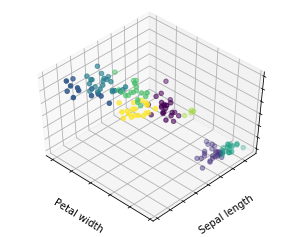

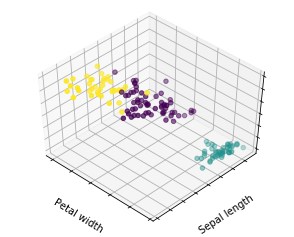

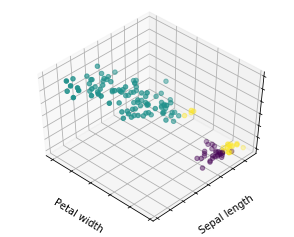

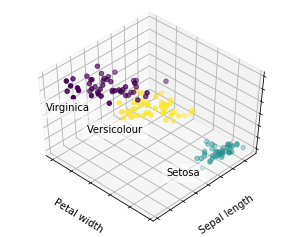

In [29]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4,3))
    plt.clf()
    ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)
    
    plt.cla()
    est.fit(X)
    labels=est.labels_
    
    ax.scatter(X[:,3],X[:,0],X[:,2],c=labels.astype(np.float))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum=fignum+1

    
    
# Plot the ground truth
fig=plt.figure(fignum,figsize=(4,3))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)

plt.cla()

for name,label in [('Setosa',0),('Versicolour',1),('Virginica',2)]:
    ax.text3D(X[y==label,3].mean(), 
                X[y==label,0].mean()+1.5,
                 X[y==label,2].mean(),name,
                 horizontalalignment='center',
                 bbox=dict(alpha=.5,edgecolor='w',facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y,[1,2,0]).astype(np.float)
yint=np.choose(y, [1,2,0])#.astype(np.float)

ax.scatter(X[:,3],X[:,0],X[:,2],c=yint)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()


In [32]:
import pandas as pd

In [37]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
print(pd.DataFrame(y).iloc[:,0].unique())

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(150, 4)
(150,)
[0 1 2]


### 1b. KNN (K=5) 

cf. [Machine Learning with Scikit-Learn](http://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)

In [40]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

In [41]:
print(metrics.accuracy_score(y,y_pred))

0.966666666667


In [42]:
### 1c. KNN (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y,y_pred))


1.0


### 2. Evaluation procedure 2 - Train/test split 

Data is randomly assigned unless you use `random_state` hyperparameter  
* If you use `random_state=4`  
    - Your data will be split exactly the same way  

In [43]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

/home/topolo/Public/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.966666666667


In [45]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [47]:
# try K=1 through K=25 and record testing accuracy  
k_range=range(1,26)

# We can create Python dictionary using [] or dict()
scores=[]

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)

[0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996]


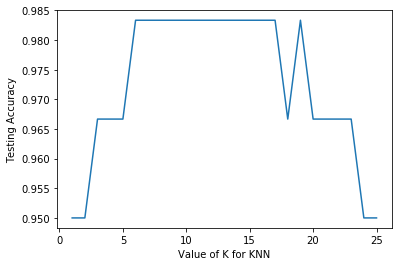

In [48]:
# import Matplotlib (scientific plotting library)
#import matplotlib.pyplot as plt

# allow plots to appear within the notebook
#%matplotlib inline

# plot the relationship between $K$ and testing accuracy
# plt.plot(x_axis,y_axis)
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [50]:
print(pd.DataFrame(X).describe())
print(pd.DataFrame(X).head())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [51]:
pd.DataFrame(X).head(10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
